In [2]:
from msc_HARE_utilities import Log, Analysis

# Configuration for your machine's filesystem and environment

In [3]:
IS_UNIX_FILE_SYSTEM = False # Are you using a UNIX filesystem?

# Initialize your analysis

In [4]:
my_analysis = Analysis(IS_UNIX_FILE_SYSTEM)

# Select experiments to analyze

In [5]:
my_analysis.display_experiment_options()

interactive(children=(Dropdown(description='Selected Experiment Folder:', options=('example_fazildgr8_progress…

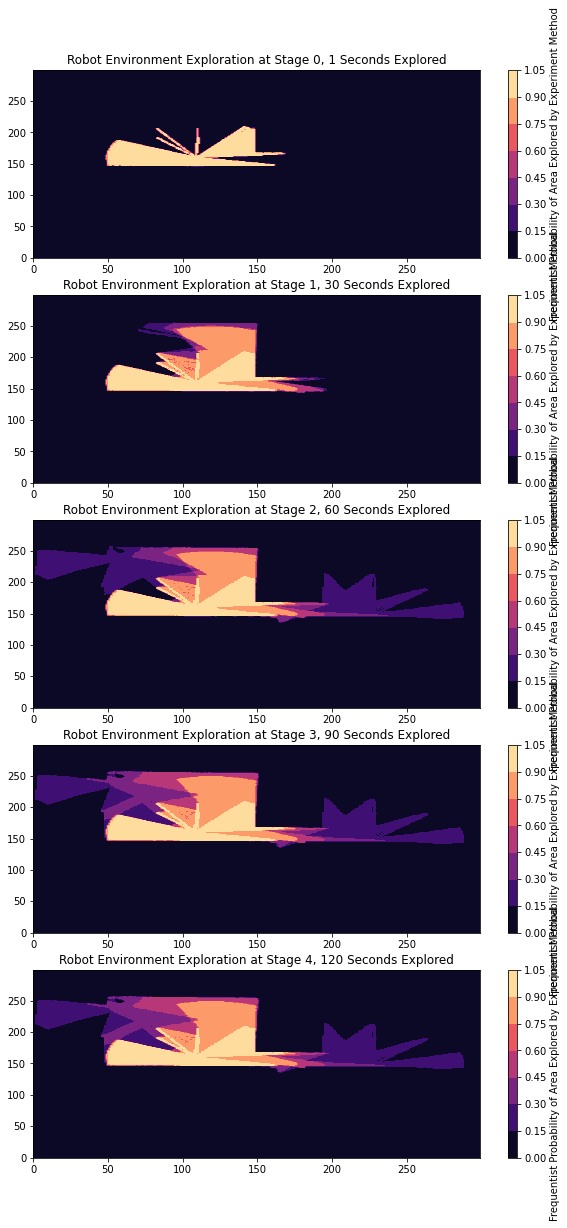

In [6]:
my_analysis.generate_visualizations(save_fig_to="time.png")

NameError: name 'plt' is not defined